# LunAPI : individuals

Links to notebooks in this repository: [Index](./00_overview.ipynb) | [Individuals](./01_indivs.ipynb) | [Projects](./02_projects.ipynb) | [Staging](./03_staging.ipynb) | [Models](./04_models.ipynb) | [Advanced](./98_advanced.ipynb) | [Reference](./99_reference.ipynb)

First, we import `lunapi` and initiate a project:

In [1]:
import lunapi as lp
proj = lp.proj()

initiated lunapi v0.0.4 <lunapi.lunapi0.luna object at 0xffff829bcf30> 

enabling console outputs


We then create a single instance: here to match the tutorial individual `nsrr02`

In [2]:
p = proj.inst( 'learn-nsrr02' )

We can then attach an EDF:

In [3]:
p.attach_edf( '/tutorial/edfs/learn-nsrr02.edf' )

___________________________________________________________________
Processing: learn-nsrr02 | /tutorial/edfs/learn-nsrr02.edf
 duration 09.57.30, 35850s | time 21.18.06 - 07.15.36 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG_sec | ECG | EMG | EOG_L | EOG_R | EEG
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OX_STAT


True

Second, we can attach the XML annotations associated with that individual:

In [4]:
p.attach_annot( '/tutorial/edfs/learn-nsrr02-profusion.xml' )

True

To get a short description of the instance, just enter its name:

In [5]:
p

<lunapi-instance id:learn-nsrr02 edf:/tutorial/edfs/learn-nsrr02.edf annot:/tutorial/edfs/learn-nsrr02-profusion.xml>

Above, we see the ID, the attached EDF and the annotation file(s) are listed, as expected.

## Simple summaries

To get some basic summary information on the attached individual: overall descriptives:

In [6]:
p.stat()

,Value
annotation_files,/tutorial/edfs/learn-nsrr02-profusion.xml
duration,09.57.30.000
edf_file,/tutorial/edfs/learn-nsrr02.edf
id,learn-nsrr02
na,10
ns,14
nt,14
state,1


A list of channels in the EDF:

In [7]:
p.channels()

,Channels
0,SaO2
1,PR
2,EEG_sec
3,ECG
4,EMG
5,EOG_L
6,EOG_R
7,EEG
8,AIRFLOW
9,THOR_RES


And a list of associated annotations:

In [8]:
p.annots()

,Annotations
0,Arousal
1,Hypopnea
2,N1
3,N2
4,N3
5,Obstructive_Apnea
6,R
7,SpO2_artifact
8,SpO2_desaturation
9,W


Below we will use the convention of calling the project variable `proj` and the current instance variable will typically be `p`.  Note that we use `p` to remind us that this is only a _pointer_ to the underlying data, that is the `p` object does not contain the signal data themselves.

## Applying Luna commands

Rather than provide specific Python functions for every command Luna supports, the same Luna command scripts (either as text files or directly specified in Python) drive all major analyses.

### Simple example

There are two main ways to evaluate Luna commands, `eval()` and `proc()`.  These differ only in how they return output.   `eval()` keeps any output in the internal instance and returns only the equivalent _console_ outputs.  Outputs are then accessed via `strata()` and `table()` functions (i.e. similar to using `detstrat` after the command-line luna).   Alternatively, `proc()` returns all outputs in a single Python data-frame (along with the console output).  Some utility functions help working with the output, as below.

In [9]:
p.eval('HEADERS')

 ..................................................................
 CMD #1: HEADERS
   options: sig=*


,Command,Stata
0,HEADERS,BL
1,HEADERS,CH


In [10]:
p.strata()

,Command,Stata
0,HEADERS,BL
1,HEADERS,CH


In [11]:
p.table('HEADERS')

,ID,EDF_ID,EDF_TYPE,NR,NS,NS_ALL,REC_DUR,REC_DUR_HMS,REC_DUR_SEC,START_DATE,START_TIME,STOP_TIME,TOT_DUR_HMS,TOT_DUR_SEC
0,learn-nsrr02,.,EDF,35850,14,14,1.0,09:57:30,35850.0,01.01.85,21.18.06,07.15.36,09.57.30,35850.0


In [12]:
p.table('HEADERS','CH')

,ID,CH,DMAX,DMIN,PDIM,PMAX,PMIN,POS,SENS,SR,TRANS,TYPE
0,learn-nsrr02,ABDO_RES,127,-128,.,-1.0,1.0,11,-0.007843,10.0,.,EFFORT
1,learn-nsrr02,AIRFLOW,127,-128,.,-1.0,1.0,9,-0.007843,10.0,.,AIRFLOW
2,learn-nsrr02,ECG,127,-128,mV,1.25,-1.25,4,0.009804,250.0,.,ECG
3,learn-nsrr02,EEG,127,-128,uV,125.0,-125.0,8,0.980392,125.0,.,EEG
4,learn-nsrr02,EEG_sec,127,-128,uV,125.0,-125.0,3,0.980392,125.0,.,EEG
5,learn-nsrr02,EMG,127,-128,uV,31.5,-31.5,5,0.247059,125.0,.,EMG
6,learn-nsrr02,EOG_L,127,-128,uV,125.0,-125.0,6,0.980392,50.0,.,EOG
7,learn-nsrr02,EOG_R,127,-128,uV,125.0,-125.0,7,0.980392,50.0,.,EOG
8,learn-nsrr02,LIGHT,1,0,.,1.0,0.0,13,1.0,1.0,.,LIGHT
9,learn-nsrr02,OX_STAT,3,0,.,3.0,0.0,14,1.0,1.0,.,OXYGEN


Alternatively, we can do the same but using the `proc()` function:

In [13]:
res = p.proc( 'HEADERS' )

 ..................................................................
 CMD #1: HEADERS
   options: sig=*


By itself, the return object `res` is a dictionary of command/strata keys, and dataframes as values.

In [14]:
res

{'HEADERS: BL':              ID EDF_ID EDF_TYPE     NR  NS NS_ALL REC_DUR REC_DUR_HMS  \
 0  learn-nsrr02      .      EDF  35850  14     14     1.0    09:57:30   
 
   REC_DUR_SEC START_DATE START_TIME STOP_TIME TOT_DUR_HMS TOT_DUR_SEC  
 0     35850.0   01.01.85   21.18.06  07.15.36    09.57.30     35850.0  ,
 'HEADERS: CH':               ID        CH   DMAX    DMIN PDIM   PMAX   PMIN POS      SENS  \
 0   learn-nsrr02  ABDO_RES    127    -128    .   -1.0    1.0  11 -0.007843   
 1   learn-nsrr02   AIRFLOW    127    -128    .   -1.0    1.0   9 -0.007843   
 2   learn-nsrr02       ECG    127    -128   mV   1.25  -1.25   4  0.009804   
 3   learn-nsrr02       EEG    127    -128   uV  125.0 -125.0   8  0.980392   
 4   learn-nsrr02   EEG_sec    127    -128   uV  125.0 -125.0   3  0.980392   
 5   learn-nsrr02       EMG    127    -128   uV   31.5  -31.5   5  0.247059   
 6   learn-nsrr02     EOG_L    127    -128   uV  125.0 -125.0   6  0.980392   
 7   learn-nsrr02     EOG_R    127    -12

### Fuller workflows

Here we consider a fuller ... (reading from a file w/ variables)

## Accessing raw signal/annotation data 

In [15]:
d = p.data( chs = [ 'EEG' , 'EEG_sec' ] , annots = [] )

In [16]:
d

(['EEG', 'EEG_sec'],
 array([[  -8.33333333,    4.41176471],
        [ -15.19607843,   -0.49019608],
        [ -16.17647059,   -6.37254902],
        ...,
        [  71.07843137,   25.        ],
        [  84.80392157,   10.29411765],
        [  51.47058824, -110.29411765]]))

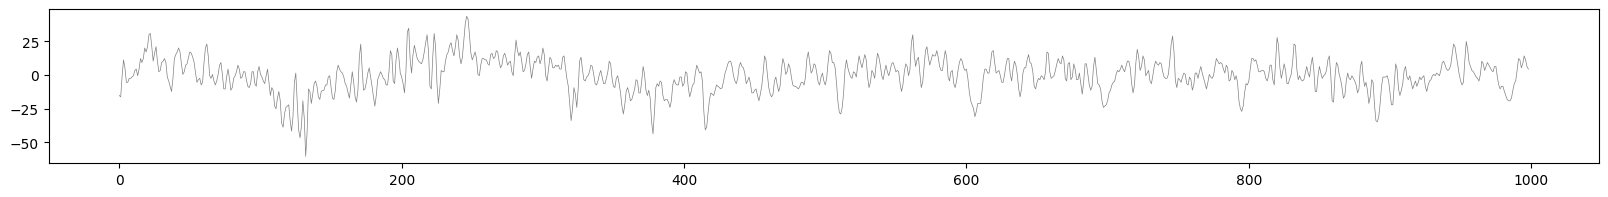

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
plt.plot( d[1][1:1000:,0] , c = 'gray' , lw = 0.5 )
plt.show()

### Get data by epoch or interval

Return epochs 5 to 10 (1-based indexes) all in a single slice:

In [18]:
p.e2i( range(5,10 ) )
d = p.slice( p.e2i( range(5,10 ) ) , chs = [ 'EEG' ] , annots = [ ] )
d

  set epochs to default 30 seconds, 1195 epochs


(['EEG'],
 array([[ 3.43137255],
        [ 0.49019608],
        [ 1.47058824],
        ...,
        [-5.39215686],
        [-2.45098039],
        [12.25490196]]))

As above, except return each epoch/interval as a separate array (i.e. `slices()` versus `slice()`):

In [19]:
#d = p.slices( p.e2i( range(5,10 ) ) , chs = [ 'EEG' ] , annots = [ ] )
# issue w/ the above, do not run 

### Updating signal data

In [24]:
p.eval( 'PSD sig=EEG spectrum dB' )

 ..................................................................
 CMD #1: PSD
   options: dB sig=EEG spectrum
  calculating PSD from 0.5 to 25 for 1 signals


,Command,Stata
0,PSD,B_CH
1,PSD,CH
2,PSD,CH_F


To load and parse (i.e. splicing in `&` characters between commands and removing comments starting `%`) a Luna script from a file, use `lp.cmdfile()`:

## Resetting the instance

after making edits. can refesh()

## Writing new files

To output new EDFs or annotation files, use the standard Luna `WRITE` or `WRITE-ANNOTS` functions, called from `eval()`.